<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_1/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cost for given values of theta = 5.524438459196242
Final value of theta = [ 5.19119589 -1.98634754  0.55288358 -0.24757678]
cost_history = [4.82258027 4.44307592 4.20358607 ... 0.73927784 0.73927379 0.73926976]
Final cost = 0.7392697573699527


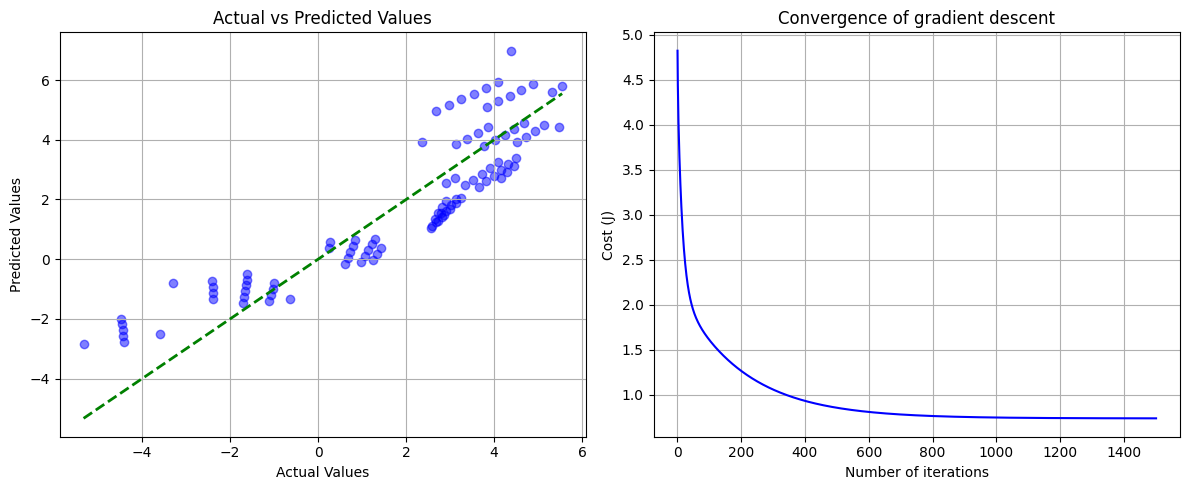

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset D3 from the github link
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
df = pd.read_csv(url)

# Separate inputs (X1, X2, X3) and output (y)
X1 = df.values[:, 0]  # Input from the first column (X1)
X2 = df.values[:, 1]  # Input from the second column (X2)
X3 = df.values[:, 2]  # Input from the third column (X3)
y = df.values[:, 3]   # Output from the 4th column (y)
m = len(y)            # Number of training examples

# Create the design matrix with X0 (ones), X1, X2, and X3
X_0 = np.ones((m, 1))  # For X0 (intercept term)
X_1 = X1.reshape(m, 1) # For X1
X_2 = X2.reshape(m, 1) # For X2
X_3 = X3.reshape(m, 1) # For X3
X = np.hstack((X_0, X_1, X_2, X_3)) # Stack all features together

# Initialize theta with zeros (now with 4 parameters: theta0, theta1, theta2, theta3)
theta = np.zeros(4)

# Cost Calculation
def compute_cost(X, y, theta):
    H_x = X.dot(theta)
    errors = H_x - y
    m = len(y)
    return (1/(2*m)) * np.sum(errors**2)

# Compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta =', cost)

def gradient_descent(X, y, theta, alpha, iterations):

    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        H_x = X.dot(theta)
        errors = np.subtract(H_x, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

theta = np.zeros(4)
iterations = 1500
alpha = 0.025

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final cost =', cost_history[-1])

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: Actual vs Predicted values
plt.subplot(1, 2, 1)
predictions = X.dot(theta)
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--', lw=2)
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Second subplot: Convergence of gradient descent
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

